# Table Of Contents
* [Supervised vs. Unsupervised Learning](#supervised)
* [scikit-learn](#scikitlearn)
* [Math](#math)
* [Machine Learning Workflow](#machinelearningworkflow)
    * [scikit-learn's train-test-split](#traintestsplit)
* [Accuracy and Context](#accuracy)
* [Generalization, Underfitting and Overfitting](#generalization)
* [Linear Models](#linearmodels)
    * [Linear Regression](#linearregression)
    * [Linear Regression Math Example](#mathexample)
    * [Lasso](#lasso)
    * [ElasticNet](#elastic)
* [Support Vector Machines](#svm)
* [Stochastic Gradient Descent](#sgd)
* [K-Nearest Neighbors](#knn)

In [26]:
import pandas as pd
import numpy as np

# Supervised vs. Unsupervised Learning <a class="anchor" id="supervised"/>

## Supervised
In supervised learning, we want to predict a certain outcome from a given input, and we have examples of input/output pairs. We can build a machine learning model based on those input/output pairs, which comprise our training set.

## Unsupervised
Unsupervised learning, on the other hand, is machine learning where there is no known ouput, no teacher to instruct the learning algorithm. Where we have the answers in supervised learning, we will just show the input data to algorithm and ask it to extract knowledge from that data.

# scikit-learn Basics <a class="anchor" id="scikitlearn"/>

It is generally not considered good practice to import the entire scikit-learn package as one statement, but rather to import only the packages that are needed at the time. For instance, if you wanted to use `LinearRegression` you can do the following:

In [27]:
from sklearn.linear_model import LinearRegression

scikit-learn also includes a number of useful datasets, which can be imported directly. Once the dataset has been loaded, in this case the Boston Housing Prices dataset, we use a `pandas.DataFrame` to hold the data.

In [28]:
from sklearn.datasets import load_boston
## display all datasets in a list

boston = load_boston()

# Math

There is no getting around the fact that machine learning is built heavily upon mathematics. For this series of meetups about machine learning, we decided that "a light dusting" would be the right amount.

# Machine Learning Workflow <a class="anchor" id="machinelearningworkflow"/>

When we work with datasets in supervised machine learning, we have to partition the data in such a way that we know that the model is actually learning instead of simply memorizing the data that was previously given to it.

## Scikit-Learn's train_test_split <a class="anchor" id="traintestsplit"/>
Scikit-Learn has a built-in method for splitting a dataset into train and test sets and is much better than trying to split a dataset by hand. You can specify the ratio of train/test, along with seeding a random number generator.

In [29]:
from sklearn.model_selection import train_test_split

Once loaded, we can create our train/test sets, with the convention that `X` is the training set and `y` is the test set. We will use the `boston.data` for our training set and `boston.target` for our test set. This is a supervised learning model and as such we have an input X and output y.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (354, 13)
y_train shape: (354,)
X_test shape: (152, 13)
y_test shape: (152,)


In the previous split we end up with four numpy arrays; two are used for training `X_train` and `y_train` and two are used for testing `X_test` and `y_test`.

## K-Nearest Neighbors <a class="anchor" id="knn"/>
An algorithm that predicts either class membership or value based on surrounding data points. `k` refers to the number of neighbors that should be examined, generally a `k` value between 3 and 5 tends to work best.

#### Pros:
* Easily understood
* Gives reasonable performance without too many adjustments
* Very fast training speed

#### Cons:
* Prediction can be very slow on larger datasets
* Requires preprocessing of the data
* Performs badly on datasets with a high number of features (>100)
* Performs very badly on datasets where most features are 0

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 0.69
Test set score: 0.52


## Accuracy and Context <a class="anchor" id="accuracy"/>

While $R^2$ is the metric that is used for regression in this presentation, there are other metrics that might be more appropriate for your application. You should always be thinking about the high-level goal of the application, often called the _business metric_. An explanation of all of the different metrics is outside of the scope of a single meetup, but there are good resources out there.

## Generalization, Underfitting and Overfitting <a class="anchor" id="generalization"/>
When training a model, the goal isn't to have the model perform well on the training set, but rather to have the model perform well on examples it hasn't seen yet. If a model is able to make accurate predictions on unseen data, we say it is able to _generalize_ from the training set to the test set. 

Underfitting is scenario in which the model doesn't learn enough from the training data. This generally comes from building a model that is _too simple_. A symptom of a model that is too simple and thus underfitting is poor performance on the training set, and truly terrible performance on the testing set.

Overfitting, on the other hand, happens when the model is _too complex_ for data it was trained on. A model that has extremely good performance on the training set while having lackluster performance on the testing set is likely to be overfitting.

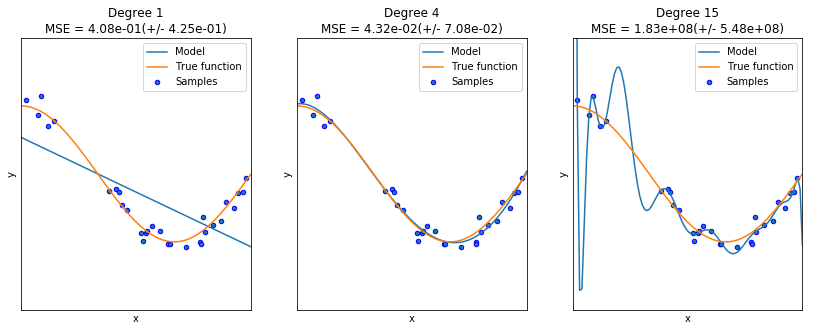

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Linear Models <a class="anchor" id="linearmodels"/>
In regression, the goal is to predict a value for a given set of data. The equation that linear models try to solve for is:

$\hat{y} = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b$

Here, $\hat{y}$, called 'y-hat' is the value we are trying to predict, `x[0]` to `x[p]` denotes the features and `w` and `b` are the parameters of the models that are learned.

#### Pros:
* Very fast to both train and predict
* Easy to understand how a prediction was made
* Can scale to very large datasets
* Work well with sparse data
* Very few parameters to tune

#### Cons:
* Coefficients can be hard to interpret
* Datasets with few features might not perform well
* Require preprocessing of data

### Linear Regression
The simplest form of Linear Regression is known as Ordinary Least Squares (OLS), which minimizes the mean squared error between predictions and the true regression targets, on the training set. 

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The weights or coefficients, are stored in the `coef_` attribute, while the intercept or offset is stored in `intercept_`.

In [33]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ -1.19858618e-01   4.44233009e-02   1.18612465e-02   2.51295058e+00
  -1.62710374e+01   3.84909910e+00  -9.85471557e-03  -1.50002715e+00
   2.41507916e-01  -1.10671867e-02  -1.01897720e+00   6.95273216e-03
  -4.88110587e-01]
lr.intercept_: 37.99259277034278


## Linear Regression Math Example <a class="anchor" id="mathexample"/>

In [81]:
y_hat = 0
row_sample = X_train[0]
for i,j in zip(lr.coef_, row_sample):
    y_hat += i * j

print("Our prediction: {:.2f}".format(y_hat + lr.intercept_))

print("Model prediction: {:.2f}".format(lr.predict(row_sample.reshape(1, -1))[0]))

Our prediction: 4.57
Model prediction: 4.57


Once we have fitted our model, we can get to the good stuff, finding out how well our model actually performs.

In [14]:
print("Training set score: {:.2f}".format(lr.sb core(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.67


### Ridge regression
The primary difference between linear regression and ridge regression lies in the addition of a constraint; we want the coefficients to be as small as possible. This means that each feature should have a very small effect on the outcome, while still having good overall model performance. This constraint is known as regularization, which restricts a model to avoid overfitting. Ridge uses `L2` regularization, which squares the coefficient value. The parameter `alpha` controls how strong the the regularization effect is; a higher alpha value can help generalization by forcing coefficients to zero. 

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.67


### Lasso <a class="anchor" id="lasso"/>
Lasso is similar to Ridge in that it uses regularization, but instead of `L2` regularization Lasso uses `L1` regularization, which takes the absolute value of the coefficient, instead of taking the square of the coefficient as `L2` does. We have the same alpha parameter as we did in Ridge which affects how strongly the regularization effect is.

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.71
Test set score: 0.61
Number of features used: 10


### ElasticNet
ElasticNet uses both `L1` and `L2` regularization, with the `l1_ratio` hyperparameter controlling the ratio between `L1` and `L2`. 

In [23]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet().fit(X_train, y_train)
print("Training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic.score(X_test, y_test)))

Training set score: 0.71
Test set score: 0.62


## SGDRegressor <a class="anchor" id="sgd"/>


According to the diagram, Stochastic Gradient Descent works best when we have greater than 100,000 samples. While the Boston Housing dataset does not, we can find a regression dataset that does. For this, we can turn to the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.html?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=instDown&view=table), in this case the [SGEMM GPU Kernel Performance Dataset](http://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance).

In [30]:
from sklearn.linear_model import SGDRegressor

sgemm = pd.read_csv('./data/sgemm_product.csv')
sgemm.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


## Support Vector Machines <a class="anchor" id="svm"/>
Support Vector Machines are another option for solving regression problems. The math behind them is complex, but they use of different kernels can allow them to work on many different types of problems.

### Pros:
* Perform well on a variety of datasets
* Work well on both high and low dimensional datasets

### Cons:
* Poor performance on larger scale datasets (>100K)
* Require careful pre-processing of data
* Difficult to inspect why predictions are made

In [34]:
from sklearn import svm

reg = svm.SVR(kernel='linear')
reg.fit(X_train, y_train)
print("Training set score: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))

Training set score: 0.74
Test set score: 0.62


## Decision Tree
As the name implies, decision tree models split the features of the dataset into a tree structure that is followed for every sample in the dataset.

### Pros:
* Easy to visualize and understand
* No pre-processing needed

### Cons:
* Even with pre-pruning, tend to overfit

In [75]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
print("Training set score: {:.2f}".format(dtr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(dtr.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.71


### Visualizing a decision tree

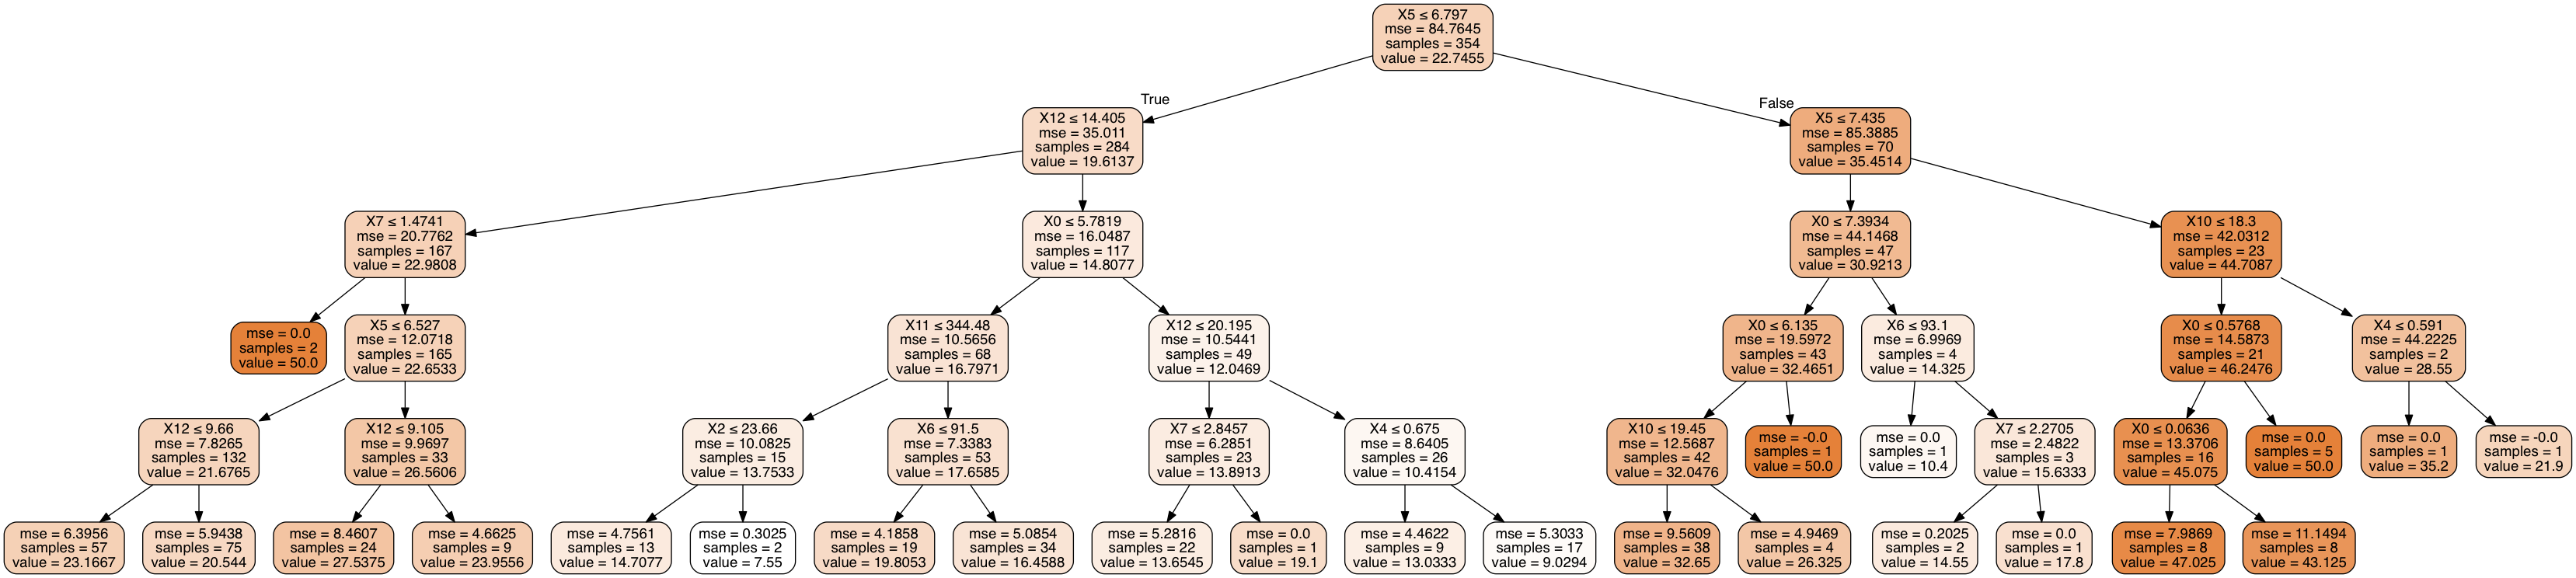

In [79]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Ensemble Models 
_Ensembles_ are methods that combine multiple machine learning models, also called _weak estimators_, to create more powerful models. While there are many different models that belong in this category, the two that we will look at are both based on decision trees, random forests and gradient boosted decision trees.

## Random Forest Regressor <a class="anchor" id="random_forest"/>
A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea is that each tree might do a relatively good job of predicting, but will likely overfit on some part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging the results.

#### Pros:
* Very powerful
* Often work well without heavy parameter tuning
* Doesn't require data scaling


#### Cons:
* More difficult to visualize than regular decision trees
* Don't work well on very high dimensional, sparse data
* Require more CPU/RAM than linear models
* Slower to train than linear models

In [45]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor().fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfr.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.78


## Gradient Boosted Regression Trees <a class="anchor" id="gbt"/>
A tree-based method that works by building trees in a serial manner, with each tree trying to correct errors made in previous trees. Gradient boosted trees are often very shallow of depth one to five, which makes the model smaller in memory usage and makes predictions faster. The basic idea is to combine many simple models or _weak learners_ into one stronger model. 

### Pros:
* Very powerful
* Widely used

### Cons:
* Requires careful tuning of the hyperparameters
* Doesn't work very well on high-dimensional sparse data
* May take a long time to train

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

gbt = GradientBoostingRegressor().fit(X_train, y_train)
print("Training set score: {:.2f}".format(gbt.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbt.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.86
